- Goal: Which F1 Racing Teams the Overall Fastest per Decade?
Objectives:

- Which race team was overall fastest?
    - Who had most wins?
    - Who had best time?
        - Lap Time
        - Race Time
- Was the race team’s success from the car or driver 
    - Which driver had most wins
    - Which driver had fastest time
        - Lap time
        - Race time

In [166]:
#Import Libraries

#Import Items
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [169]:
# Load Datasets (CSV)

drivers = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/drivers.csv')
constructors = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/constructors.csv')
races = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/races.csv')
lap_times = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/lap_times.csv')
results = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/results.csv')
constructor_results = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/constructor_results.csv')
constructor_standings = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/constructor_standings.csv')
driver_standings = pd.read_csv('/Users/coltonp/OneDrive/UMGC Data Bootcamp/UMGC_DataAnalysis_Bootcamp/UMGC_DataAnalysis_Bootcamp/SchoolWork/UMGC_DataBootcamp_Assignments/Capstone Project/16 Capstone/16.1 DataSet/Fourmula1 World Championship (1950-2023).Dataset/DataSets/driver_standings.csv')

Looking at dataframes

In [170]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [171]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [172]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [173]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [174]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [175]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [176]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [177]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [178]:
#Merge dataframes together

df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'surname', 'code']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name']], on = 'constructorId', how = 'left')

df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,surname,code,name_y
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,Australian Grand Prix,1,Hamilton,HAM,McLaren
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,Australian Grand Prix,1,Heidfeld,HEI,BMW Sauber
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,Australian Grand Prix,1,Rosberg,ROS,Williams
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,Australian Grand Prix,1,Alonso,ALO,Renault
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,Australian Grand Prix,1,Kovalainen,KOV,McLaren


In [179]:
#Drop Unneed Columns from Dataframe

df.drop(['number', 'positionText', 'statusId'], axis=1, inplace = True)

In [180]:
#Rename Column Names

df.rename(columns = {'grid': 'Grid', 'position' : 'Position', 'positionOrder': 'Position_Order', 
                     'points': 'Points', 'time': 'Time', 
                     'milliseconds':'Milliseconds', 'laps': 'Laps', 'fastestLap': 'Fastest_Lap', 
                     'rank':'Fastest_Lap_Rank', 'fastestLapTime': 'Fastest_Lap_Time', 
                     'fastestLapSpeed':'Average_Lap_Speed', 'year': 'Year', 
                     'name_x': 'Grand_Prix', 'round': 'Round', 
                     'surname': 'Driver_Name', 'code': 'Driver_Code', 'name_y': 'Team',
                     'resultId': 'ResultID','raceId': 'RaceID', 'driverId': 'DriverID', 'constructorId': 'TeamID'}, inplace=True)

In [181]:
df.head()

,ResultID,RaceID,DriverID,TeamID,Grid,Position,Position_Order,Points,Laps,Time,Milliseconds,Fastest_Lap,Fastest_Lap_Rank,Fastest_Lap_Time,Average_Lap_Speed,Year,Grand_Prix,Round,Driver_Name,Driver_Code,Team
0,1,18,1,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,Hamilton,HAM,McLaren
1,2,18,2,2,5,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,Heidfeld,HEI,BMW Sauber
2,3,18,3,3,7,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,Rosberg,ROS,Williams
3,4,18,4,4,11,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,Alonso,ALO,Renault
4,5,18,5,1,3,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,Kovalainen,KOV,McLaren


In [182]:
def extract_decade(year):
    decade = year - (year%10)
    return str(decade)+'s'
df['Decade'] = df['Year'].apply(extract_decade)

In [183]:
df.head()

,ResultID,RaceID,DriverID,TeamID,Grid,Position,Position_Order,Points,Laps,Time,Milliseconds,Fastest_Lap,Fastest_Lap_Rank,Fastest_Lap_Time,Average_Lap_Speed,Year,Grand_Prix,Round,Driver_Name,Driver_Code,Team,Decade
0,1,18,1,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,Hamilton,HAM,McLaren,2000s
1,2,18,2,2,5,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,Heidfeld,HEI,BMW Sauber,2000s
2,3,18,3,3,7,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,Rosberg,ROS,Williams,2000s
3,4,18,4,4,11,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,Alonso,ALO,Renault,2000s
4,5,18,5,1,3,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,Kovalainen,KOV,McLaren,2000s


In [184]:
#Re-arrange Columns

df = df[['Decade', 'Year', 'ResultID', 'RaceID', 'DriverID', 'Driver_Name', 'Driver_Code', 'Team', 'TeamID', 'Grand_Prix', 
         'Grid', 'Round', 'Position', 'Position_Order',
         'Points', 'Laps', 'Time', 'Milliseconds',
         'Fastest_Lap_Rank', 'Fastest_Lap', 'Fastest_Lap_Time', 
         'Average_Lap_Speed']]

In [185]:
#Sort dataframe

df_old = df.sort_values(by=['Year', 'Decade'], axis=0, ascending= [True, True], 
                      inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
df_old.head()

,Decade,Year,ResultID,RaceID,DriverID,Driver_Name,Driver_Code,Team,TeamID,Grand_Prix,Grid,Round,Position,Position_Order,Points,Laps,Time,Milliseconds,Fastest_Lap_Rank,Fastest_Lap,Fastest_Lap_Time,Average_Lap_Speed
20024,1950s,1950,20025,833,642,Farina,\N,Alfa Romeo,51,British Grand Prix,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N
20025,1950s,1950,20026,833,786,Fagioli,\N,Alfa Romeo,51,British Grand Prix,2,1,2,2,6.0,70,+2.6,8006200,\N,\N,\N,\N
20026,1950s,1950,20027,833,686,Parnell,\N,Alfa Romeo,51,British Grand Prix,4,1,3,3,4.0,70,+52.0,8055600,\N,\N,\N,\N
20027,1950s,1950,20028,833,704,Cabantous,\N,Talbot-Lago,154,British Grand Prix,6,1,4,4,3.0,68,\N,\N,\N,\N,\N,\N
20028,1950s,1950,20029,833,627,Rosier,\N,Talbot-Lago,154,British Grand Prix,9,1,5,5,2.0,68,\N,\N,\N,\N,\N,\N


In [186]:
#Sort dataframe

df_new = df.sort_values(by=['Year', 'Decade'], axis=0, ascending= [False, False], 
                      inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
df_new.head()

,Decade,Year,ResultID,RaceID,DriverID,Driver_Name,Driver_Code,Team,TeamID,Grand_Prix,Grid,Round,Position,Position_Order,Points,Laps,Time,Milliseconds,Fastest_Lap_Rank,Fastest_Lap,Fastest_Lap_Time,Average_Lap_Speed
25400,2020s,2022,25406,1074,844,Leclerc,LEC,Ferrari,6,Bahrain Grand Prix,1,1,1,1,26.0,57,1:37:33.584,5853584,1,51,1:34.570,206.018
25401,2020s,2022,25407,1074,832,Sainz,SAI,Ferrari,6,Bahrain Grand Prix,3,1,2,2,18.0,57,+5.598,5859182,3,52,1:35.740,203.501
25402,2020s,2022,25408,1074,1,Hamilton,HAM,Mercedes,131,Bahrain Grand Prix,5,1,3,3,15.0,57,+9.675,5863259,5,53,1:36.228,202.469
25403,2020s,2022,25409,1074,847,Russell,RUS,Mercedes,131,Bahrain Grand Prix,9,1,4,4,12.0,57,+11.211,5864795,6,56,1:36.302,202.313
25404,2020s,2022,25410,1074,825,Magnussen,MAG,Haas F1 Team,210,Bahrain Grand Prix,7,1,5,5,10.0,57,+14.754,5868338,8,53,1:36.623,201.641


In [187]:
#Replace "\N" with "NaN values" in Dataframe

df.Time.replace('\\N', np.nan, inplace = True)
df.Milliseconds.replace('\\N', np.nan, inplace = True)
df.Fastest_Lap_Rank.replace('\\N', np.nan, inplace = True)
df.Fastest_Lap_Time.replace('\\N', np.nan, inplace = True)
df.Average_Lap_Speed.replace('\\N', np.nan, inplace = True)
df.Fastest_Lap.replace('\\N', np.nan, inplace = True)
df.Driver_Code.replace('\\N', np.nan, inplace = True)
df.Position.replace('\\N', np.nan, inplace =True)

df.head()

,Decade,Year,ResultID,RaceID,DriverID,Driver_Name,Driver_Code,Team,TeamID,Grand_Prix,Grid,Round,Position,Position_Order,Points,Laps,Time,Milliseconds,Fastest_Lap_Rank,Fastest_Lap,Fastest_Lap_Time,Average_Lap_Speed
0,2000s,2008,1,18,1,Hamilton,HAM,McLaren,1,Australian Grand Prix,1,1,1,1,10.0,58,1:34:50.616,5690616,2,39,1:27.452,218.300
1,2000s,2008,2,18,2,Heidfeld,HEI,BMW Sauber,2,Australian Grand Prix,5,1,2,2,8.0,58,+5.478,5696094,3,41,1:27.739,217.586
2,2000s,2008,3,18,3,Rosberg,ROS,Williams,3,Australian Grand Prix,7,1,3,3,6.0,58,+8.163,5698779,5,41,1:28.090,216.719
3,2000s,2008,4,18,4,Alonso,ALO,Renault,4,Australian Grand Prix,11,1,4,4,5.0,58,+17.181,5707797,7,58,1:28.603,215.464
4,2000s,2008,5,18,5,Kovalainen,KOV,McLaren,1,Australian Grand Prix,3,1,5,5,4.0,58,+18.014,5708630,1,43,1:27.418,218.385


In [188]:
df.dtypes

Decade                object
Year                   int64
ResultID               int64
RaceID                 int64
DriverID               int64
Driver_Name           object
Driver_Code           object
Team                  object
TeamID                 int64
Grand_Prix            object
Grid                   int64
Round                  int64
Position              object
Position_Order         int64
Points               float64
Laps                   int64
Time                  object
Milliseconds          object
Fastest_Lap_Rank      object
Fastest_Lap           object
Fastest_Lap_Time      object
Average_Lap_Speed     object
dtype: object

In [189]:
#Change the Data Types of Some of the Columns within the Dataframe

df.Decade = df.Decade.astype(object)
df.Position = df.Position.astype(float)
df.Time = df.Time.astype(object)
df.Milliseconds = df.Milliseconds.astype(float)
df.Fastest_Lap_Rank = df.Fastest_Lap_Rank.astype(float)
df.Fastest_Lap = df.Fastest_Lap.astype(float)
df.Fastest_Lap_Time = df.Fastest_Lap_Time.astype(object)
df.Average_Lap_Speed = df.Average_Lap_Speed.astype(float)

In [190]:
df.dtypes

Decade                object
Year                   int64
ResultID               int64
RaceID                 int64
DriverID               int64
Driver_Name           object
Driver_Code           object
Team                  object
TeamID                 int64
Grand_Prix            object
Grid                   int64
Round                  int64
Position             float64
Position_Order         int64
Points               float64
Laps                   int64
Time                  object
Milliseconds         float64
Fastest_Lap_Rank     float64
Fastest_Lap          float64
Fastest_Lap_Time      object
Average_Lap_Speed    float64
dtype: object

- Anwsering Objectives:

- Which race team was overall fastest?
    - Who had most wins?
- Who had best time?
    - Lap Time
    - Race Time

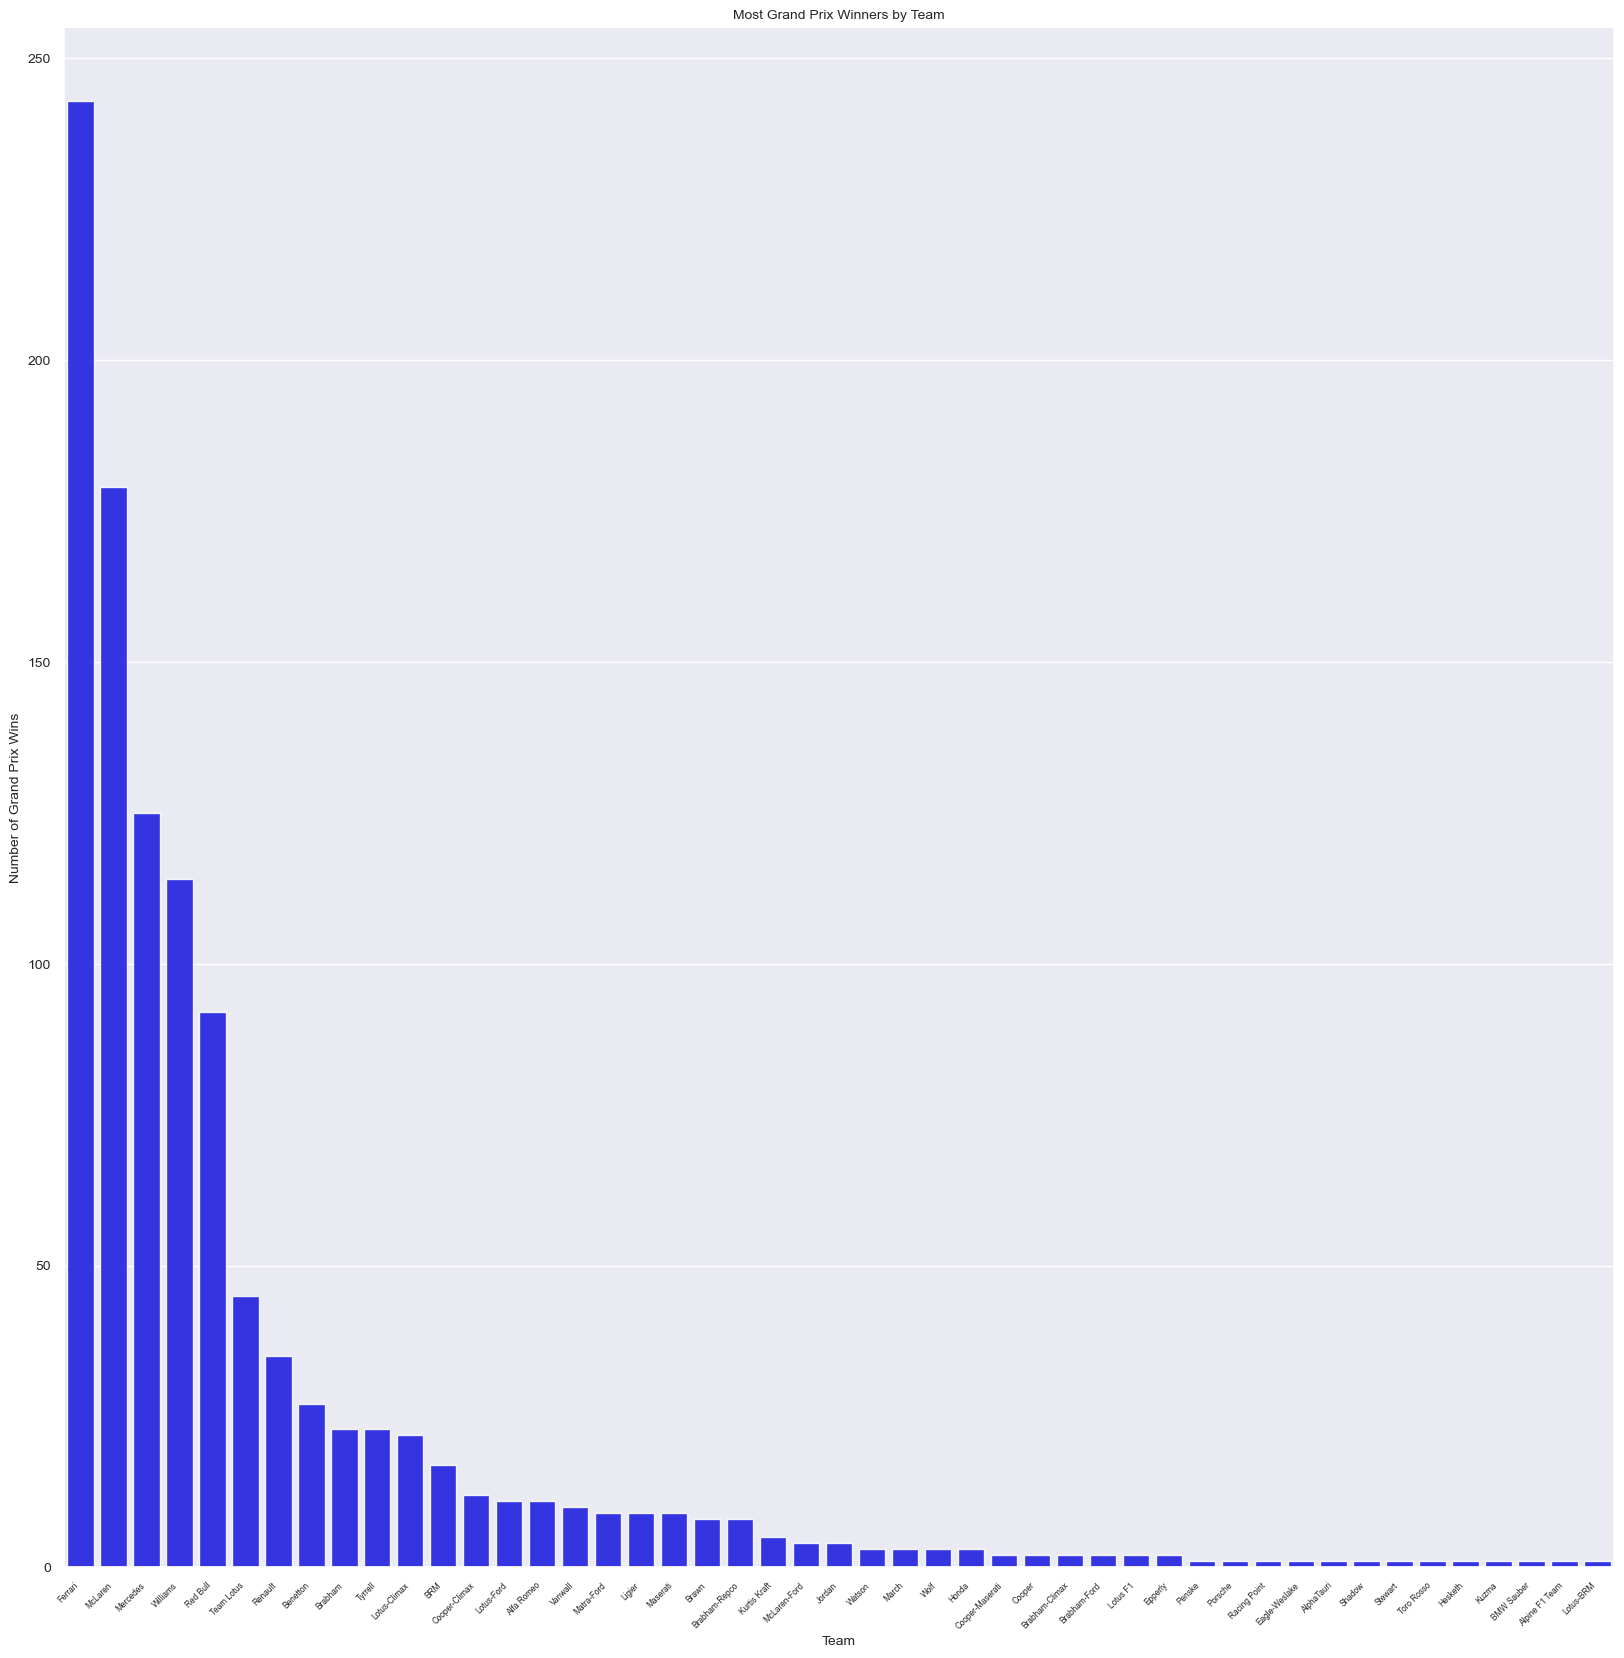

In [191]:
Team_Winner = df.loc[df['Position_Order'] == 1].groupby('Team') ['Position_Order'].count().sort_values(ascending = False).to_frame().reset_index()
sns.barplot(data = Team_Winner, y = 'Position_Order', x = 'Team', color= 'Blue', alpha=0.9)
plt.title("Most Grand Prix Winners by Team", fontsize = 10)
plt.ylabel('Number of Grand Prix Wins', fontsize = 10)
plt.xlabel('Team', fontsize = 10)
plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(axis = 'x', which= 'major', labelsize =6)
plt.tick_params(axis = 'y', which= 'major', labelsize =10)

In [192]:
Team10 = Team_Winner.head(10)

print(Team10)

         Team  Position_Order
0     Ferrari             243
1     McLaren             179
2    Mercedes             125
3    Williams             114
4    Red Bull              92
5  Team Lotus              45
6     Renault              35
7    Benetton              27
8     Brabham              23
9     Tyrrell              23


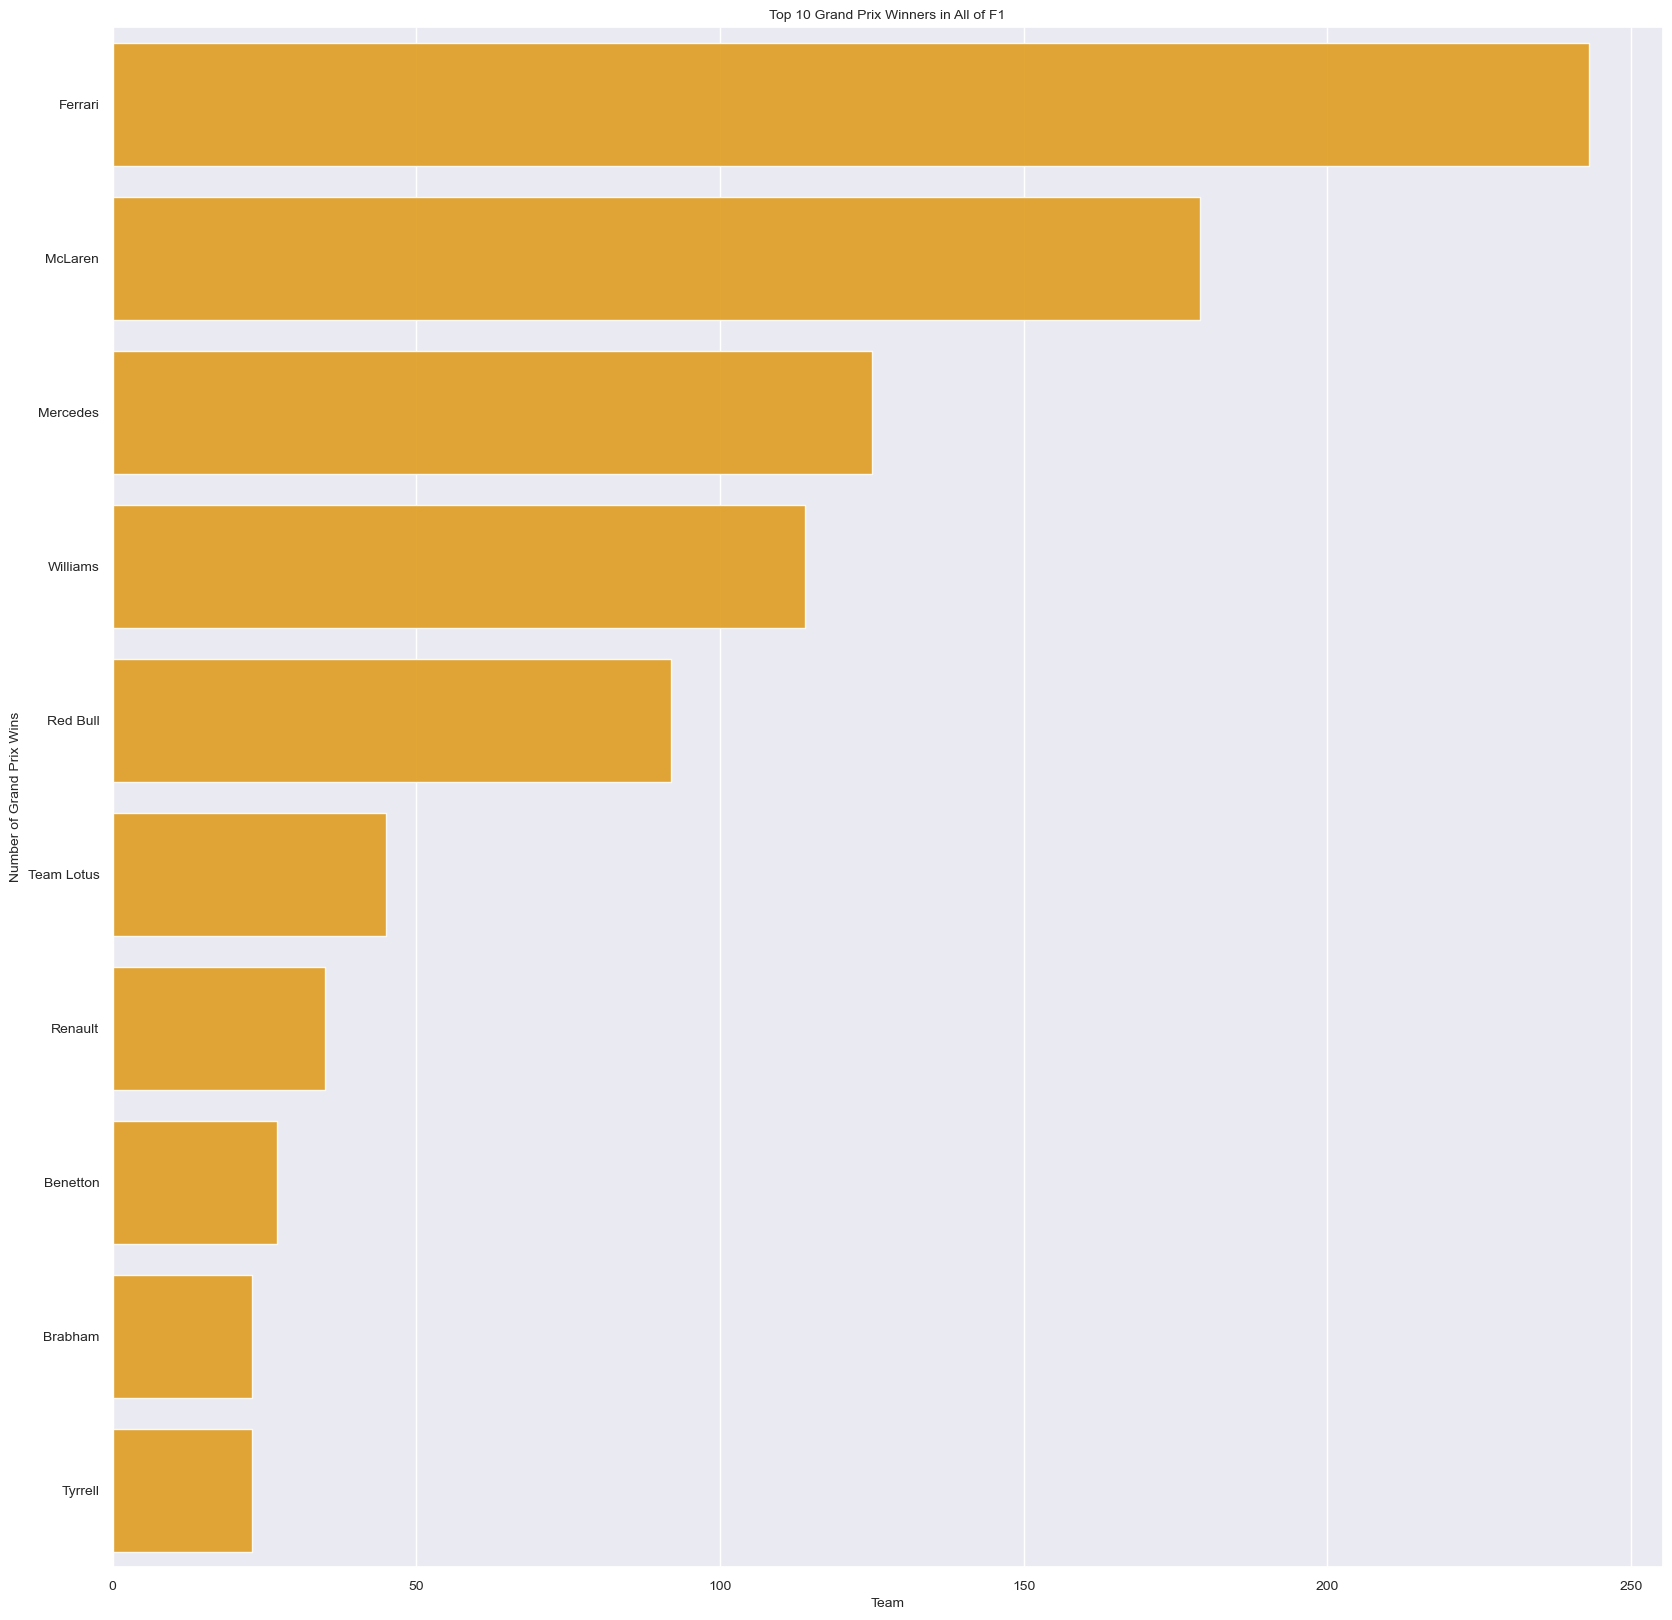

In [193]:
sns.barplot(data = Team10, y = 'Team', x = 'Position_Order', color= 'Orange', alpha=0.9)
plt.title("Top 10 Grand Prix Winners in All of F1", fontsize = 10)
plt.ylabel('Number of Grand Prix Wins', fontsize = 10)
plt.xlabel('Team', fontsize = 10)
plt.tick_params(axis = 'both', which= 'major', labelsize =10)

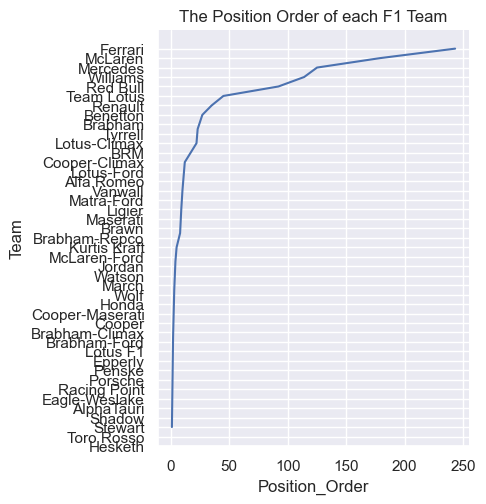

In [194]:
Fastest_Team = sns.relplot(x="Position_Order", y="Team",
           data=Team_Winner, kind="line",
           ci=None).set(title = "The Position Order of each F1 Team")
sns.color_palette("Set3")

plt.show(Fastest_Team)

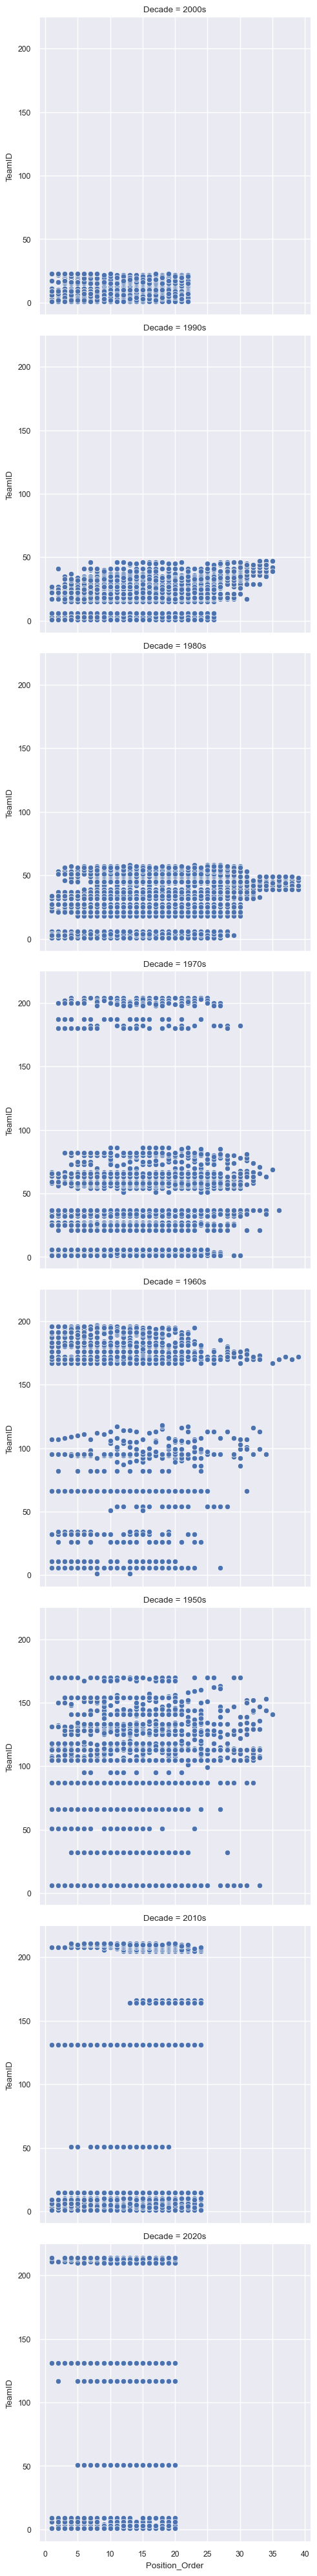

In [195]:
#Position Order of F1 Team per Decade (Scatter)

sns.set(font_scale=.8)
sns.relplot(x="Position_Order", y="TeamID", 
            data=df,
            kind="scatter", 
            row="Decade")
plt.show()

 - We can see the differences in teams and their final race positions per year. We can see a large amount of clumps throughout the various decades. With differnt clumps of teams sitting at different positions throughout the decade.

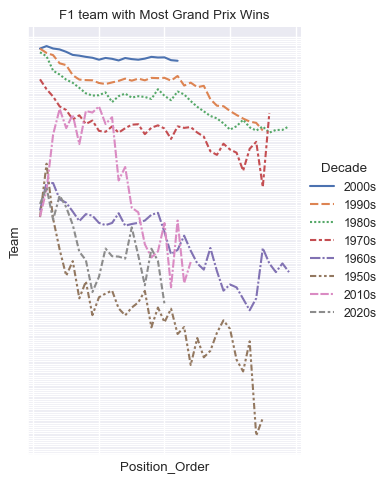

In [232]:
#Position Order of F1 Team per Decade (Line)

sns.relplot(x="Position_Order", y="Team",
           data=df, kind="line",
           style="Decade", 
           hue="Decade",
           ci=None).set(title = "F1 team with Most Grand Prix Wins")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
sns.color_palette("Set3")
plt.show()

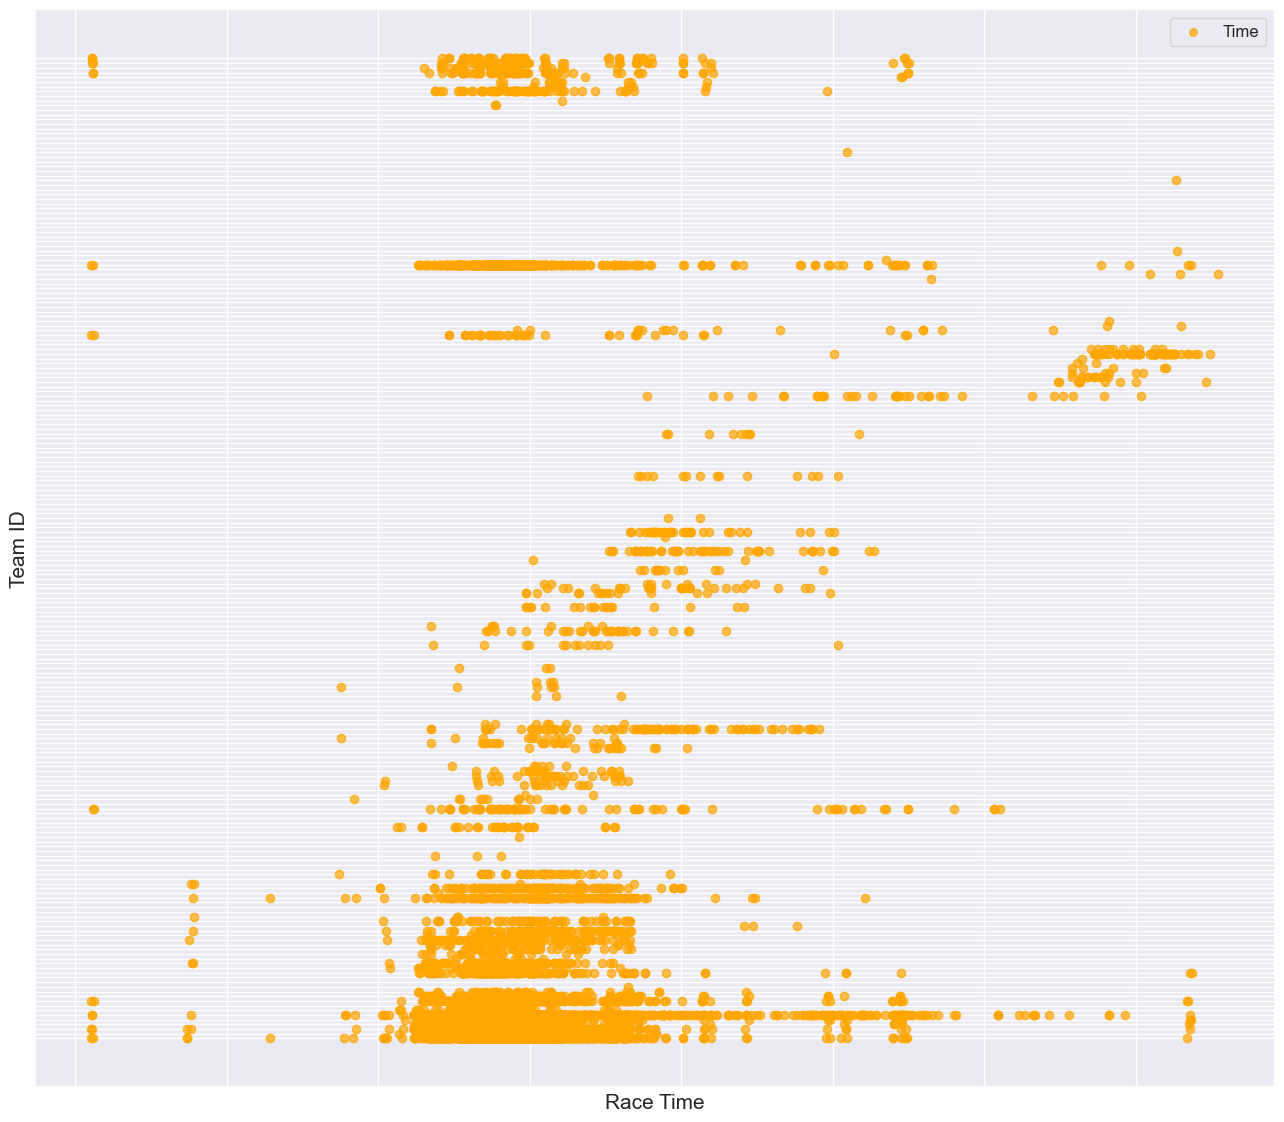

In [231]:
#Scatter plot showcaseing F1 team and the times it took them to finish each Grand Prix

plt.figure(figsize = (16,14))
plt.scatter(df.Milliseconds, df.Team, alpha = 0.7, color = "Orange", label = "Time")
plt.xlabel("Race Time", fontsize= 15)
plt.ylabel("Team ID", fontsize = 15)
plt.legend(markerscale=.9, fontsize= 12)
plt.grid(True)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.tick_params(axis = 'x', which= 'major', labelsize =15)
plt.tick_params(axis = 'y', which= 'major', labelsize = 18)
plt.show()

- Anwsered Objectives:

- Which race team was overall fastest?:
    - Who had most wins?
        - Farrari(2347)
        - McLaren (1831)
    - Who had best time?
        - Lap Time
            - Mercedes (0:55.404) 
            - McLaren (0:56.905)
            - Ferrari (1:17.690)
        - Race Time 
            - March (0:57:59.69) 
            - McLaren (1:08:05.002)
            - Ferrari (1:01:07.740)

- Anwering Objectives 2: 

- Was the race team’s success from the car or driver 
    - Which driver had most wins 
    - Which driver had fastest time
        - Lap time
        - Race time

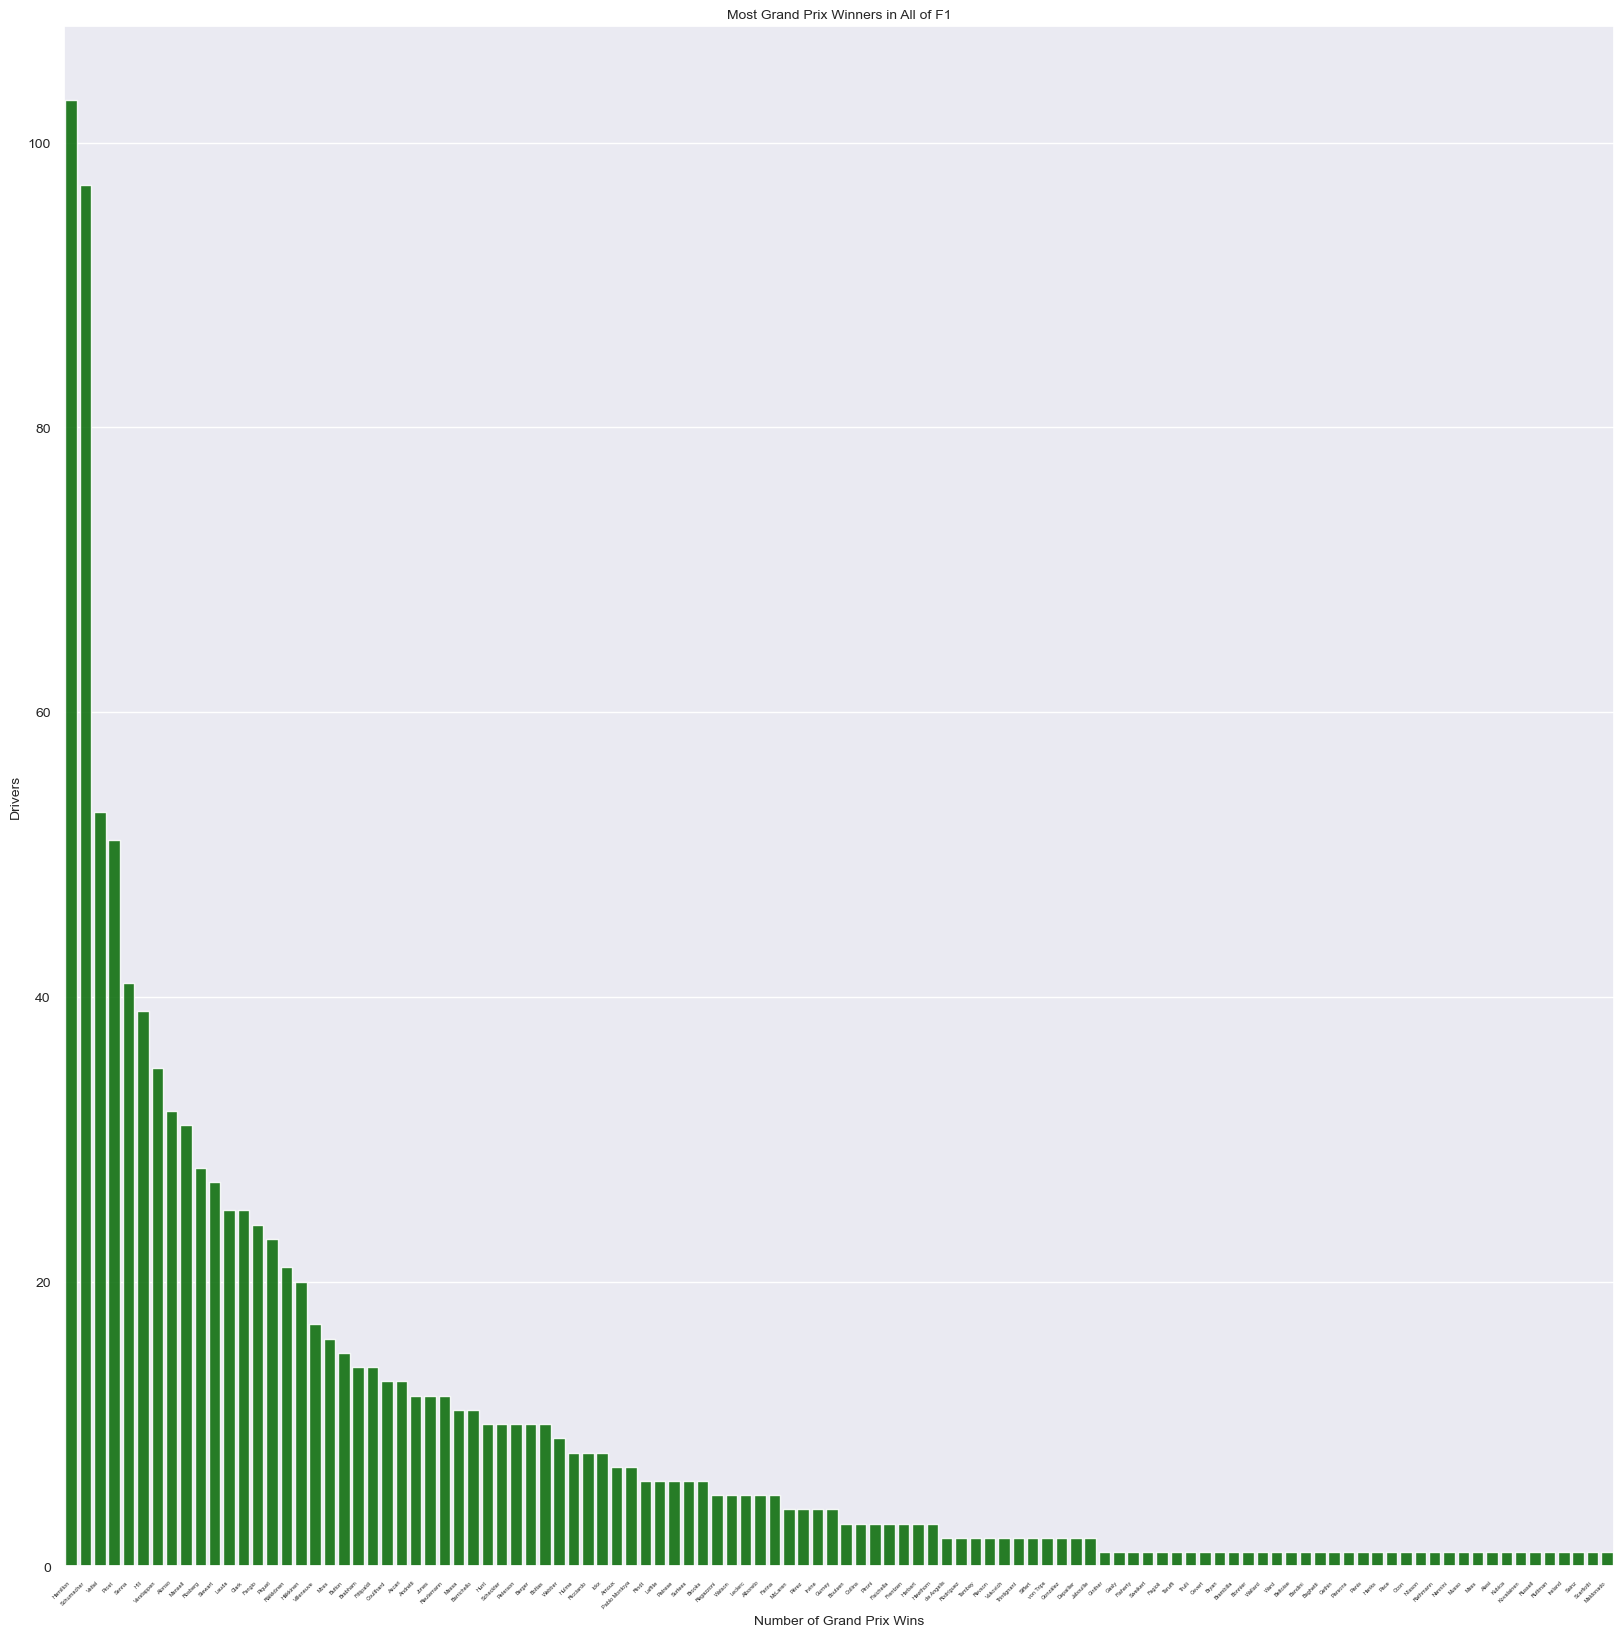

In [198]:
GP_Winner = df.loc[df['Position_Order'] == 1].groupby('Driver_Name')['Position_Order'].count().sort_values(ascending = False).to_frame().reset_index()

sns.barplot(data = GP_Winner, y = 'Position_Order', x = 'Driver_Name', color= 'Green', alpha=0.9)
plt.ylabel('Drivers', fontsize= 10)
plt.xlabel('Number of Grand Prix Wins', fontsize=10)
plt.title("Most Grand Prix Winners in All of F1", fontsize=10)
plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(axis = 'both', which= 'major', labelsize =4)
plt.tick_params(axis= 'y', which= 'major', labelsize= 10)

In [199]:
Top10 = GP_Winner.head(10)

print(Top10)

  Driver_Name  Position_Order
0    Hamilton             103
1  Schumacher              97
2      Vettel              53
3       Prost              51
4       Senna              41
5        Hill              39
6  Verstappen              35
7      Alonso              32
8     Mansell              31
9     Rosberg              28


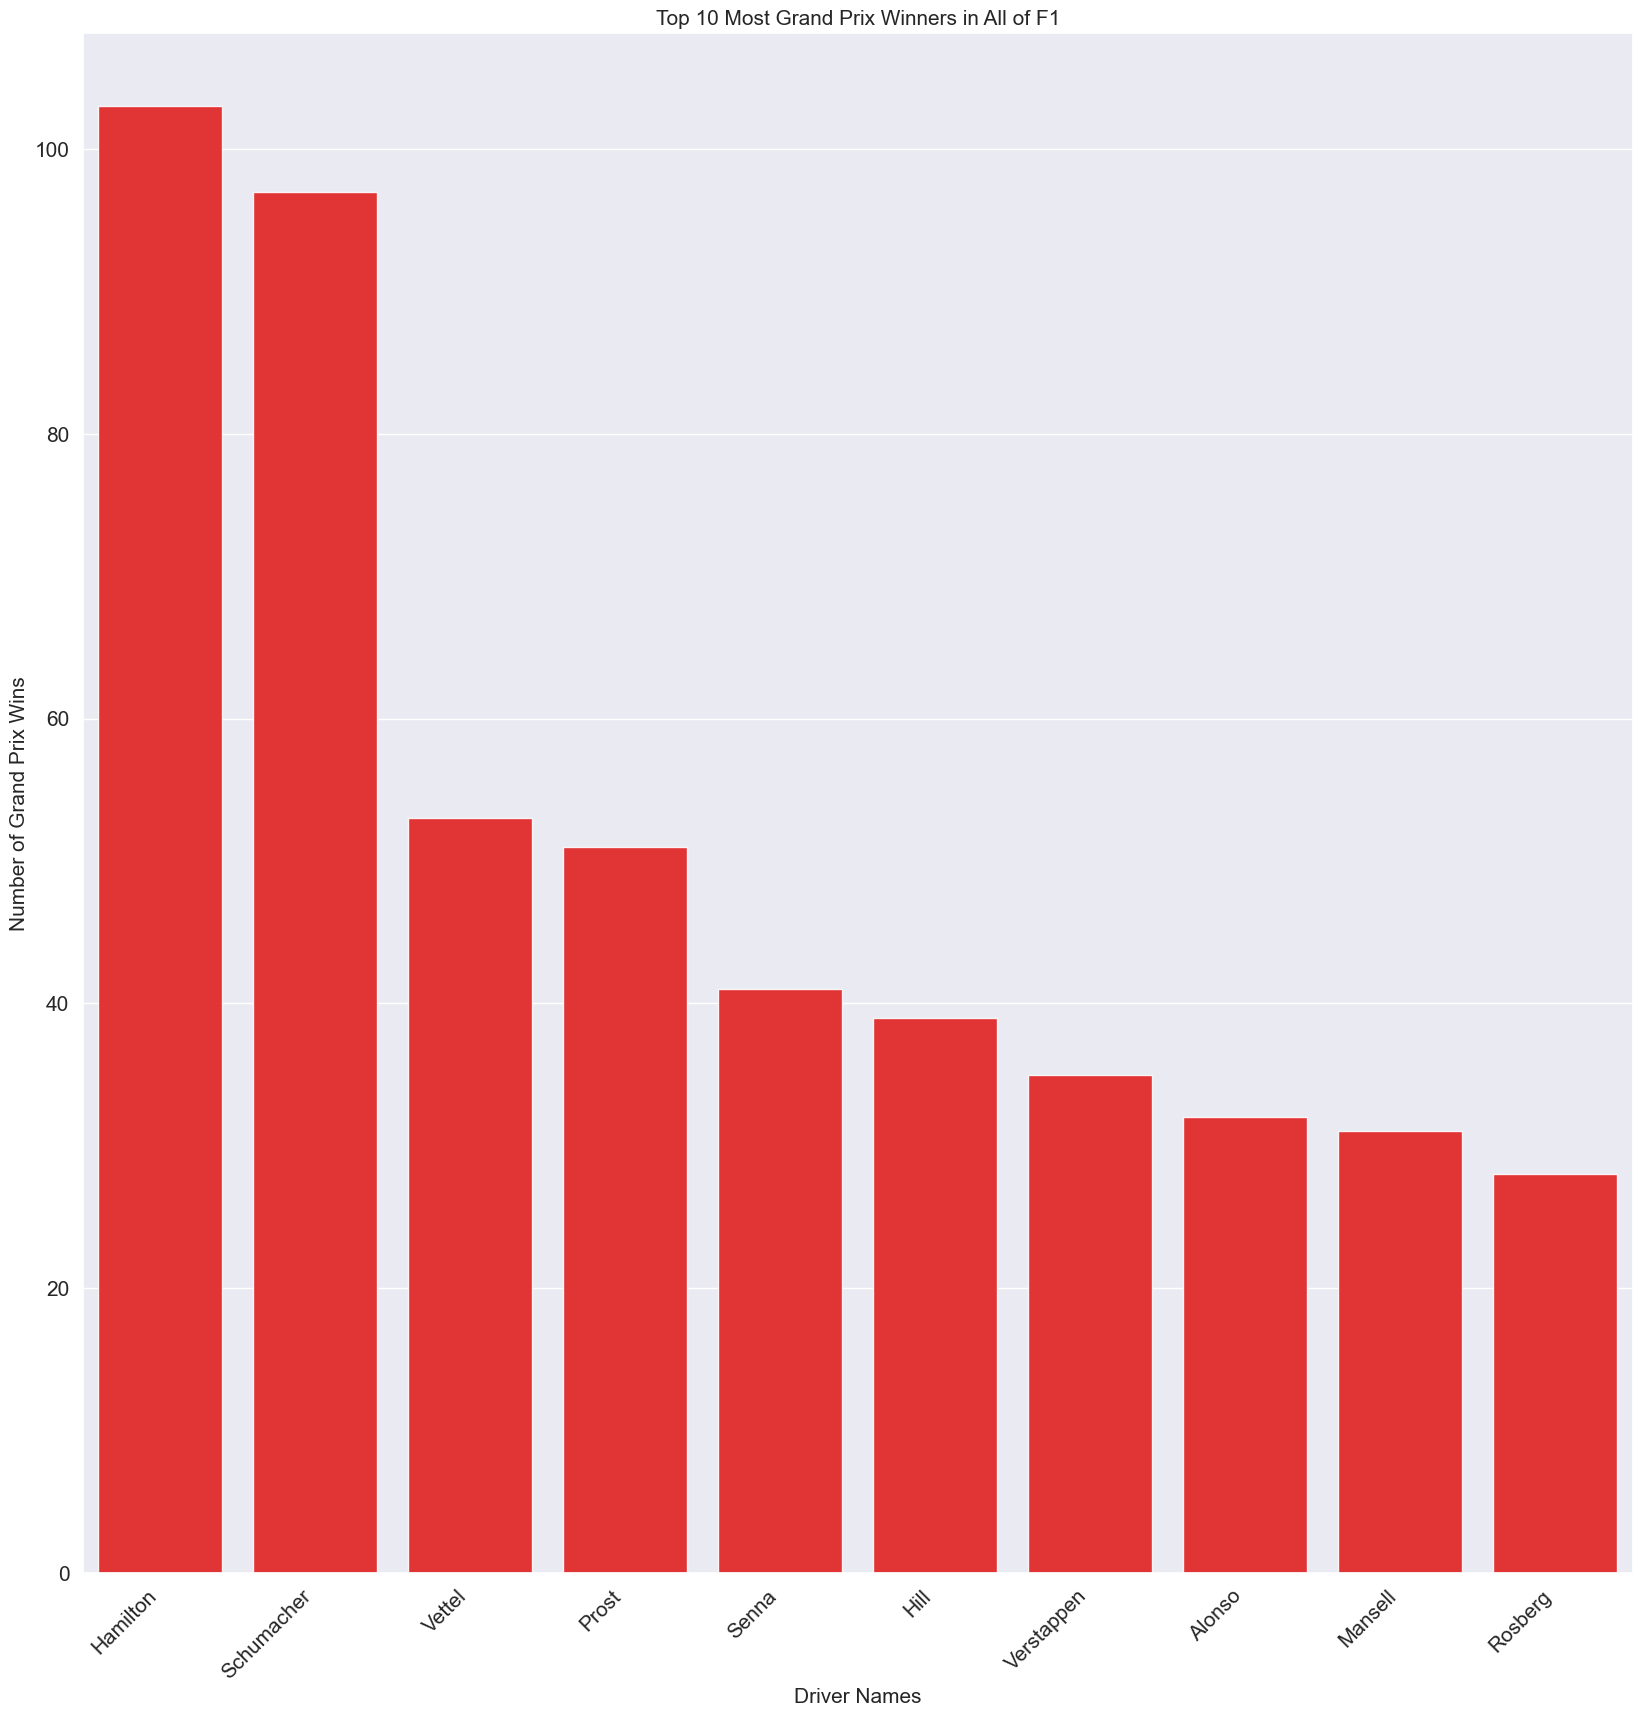

In [212]:
sns.barplot(data = Top10, y = 'Position_Order', x = 'Driver_Name', color= 'Red', alpha=0.9)
plt.title("Top 10 Most Grand Prix Winners in All of F1", fontsize=15)
plt.ylabel('Number of Grand Prix Wins', fontsize=15)
plt.xlabel('Driver Names', fontsize=15)
plt.xticks(rotation = 45, ha = 'right')
plt.tick_params(axis = 'both', which= 'major', labelsize =15)

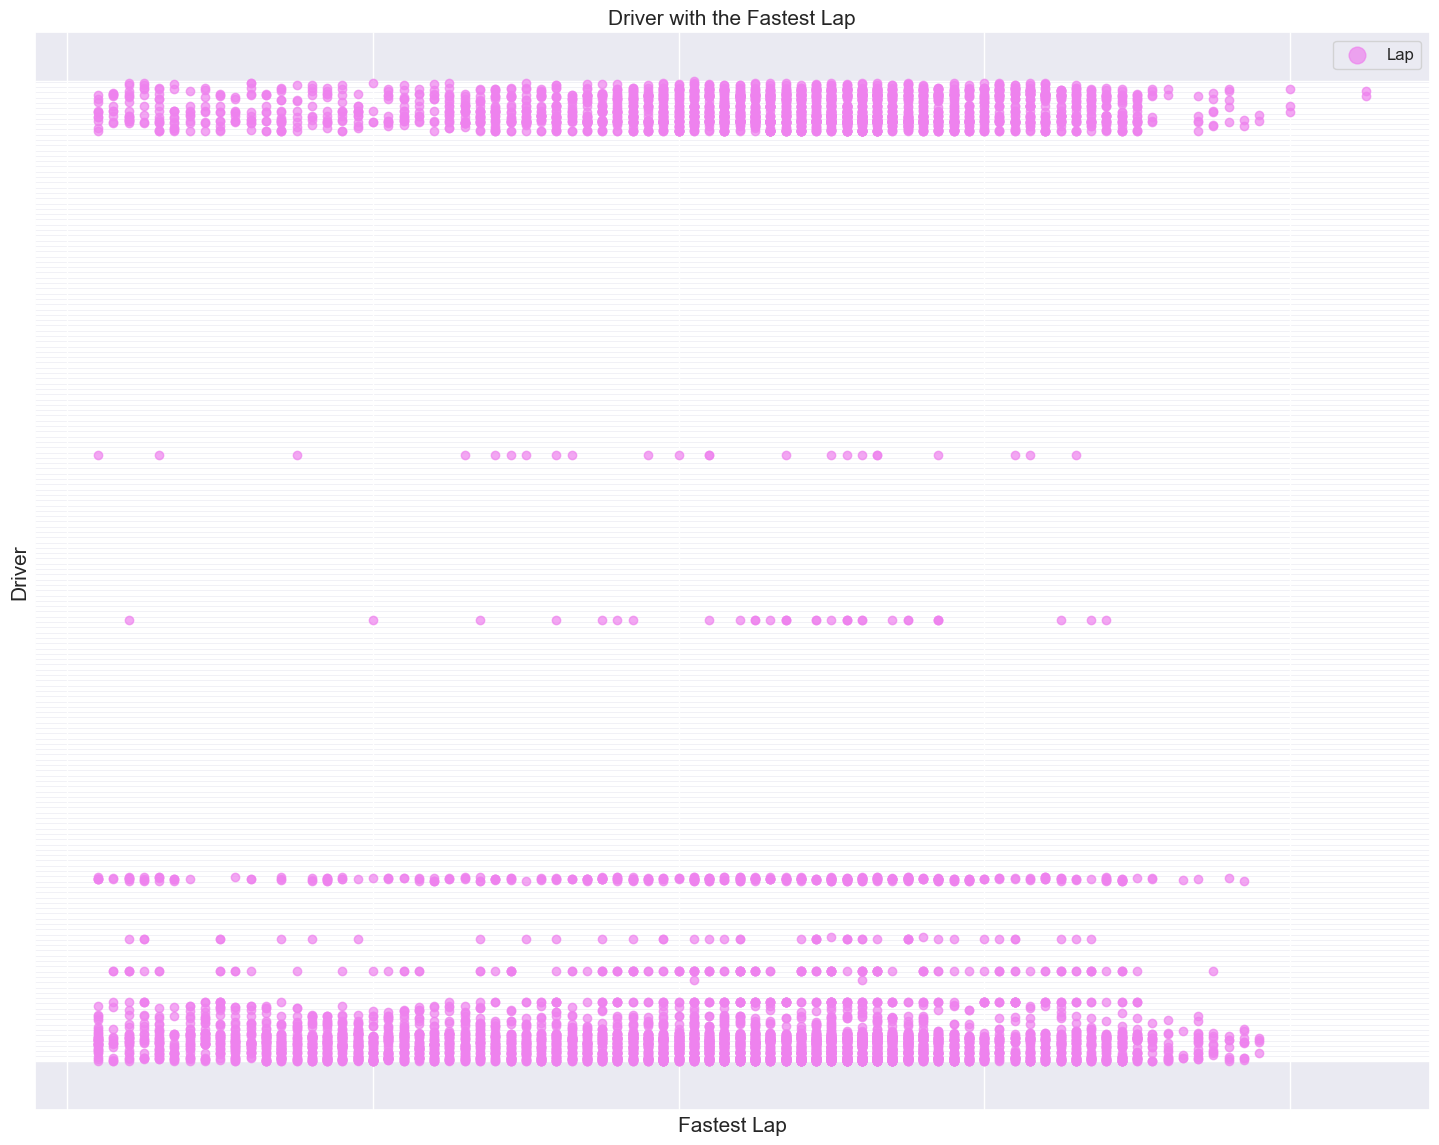

In [230]:
plt.figure(figsize = (18,14))
plt.scatter(df.Fastest_Lap, df.Driver_Name, alpha = 0.7, color = "Violet", label = "Lap")
plt.xlabel("Fastest Lap", fontsize= 15)
plt.ylabel("Driver", fontsize = 15)
plt.title("Driver with the Fastest Lap", fontsize = 15)
plt.legend(markerscale=2, fontsize= 12)
plt.grid(True)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.tick_params(axis = 'x', which= 'major', labelsize =15)
plt.tick_params(axis = 'y', which= 'major', labelsize =5)
plt.show()

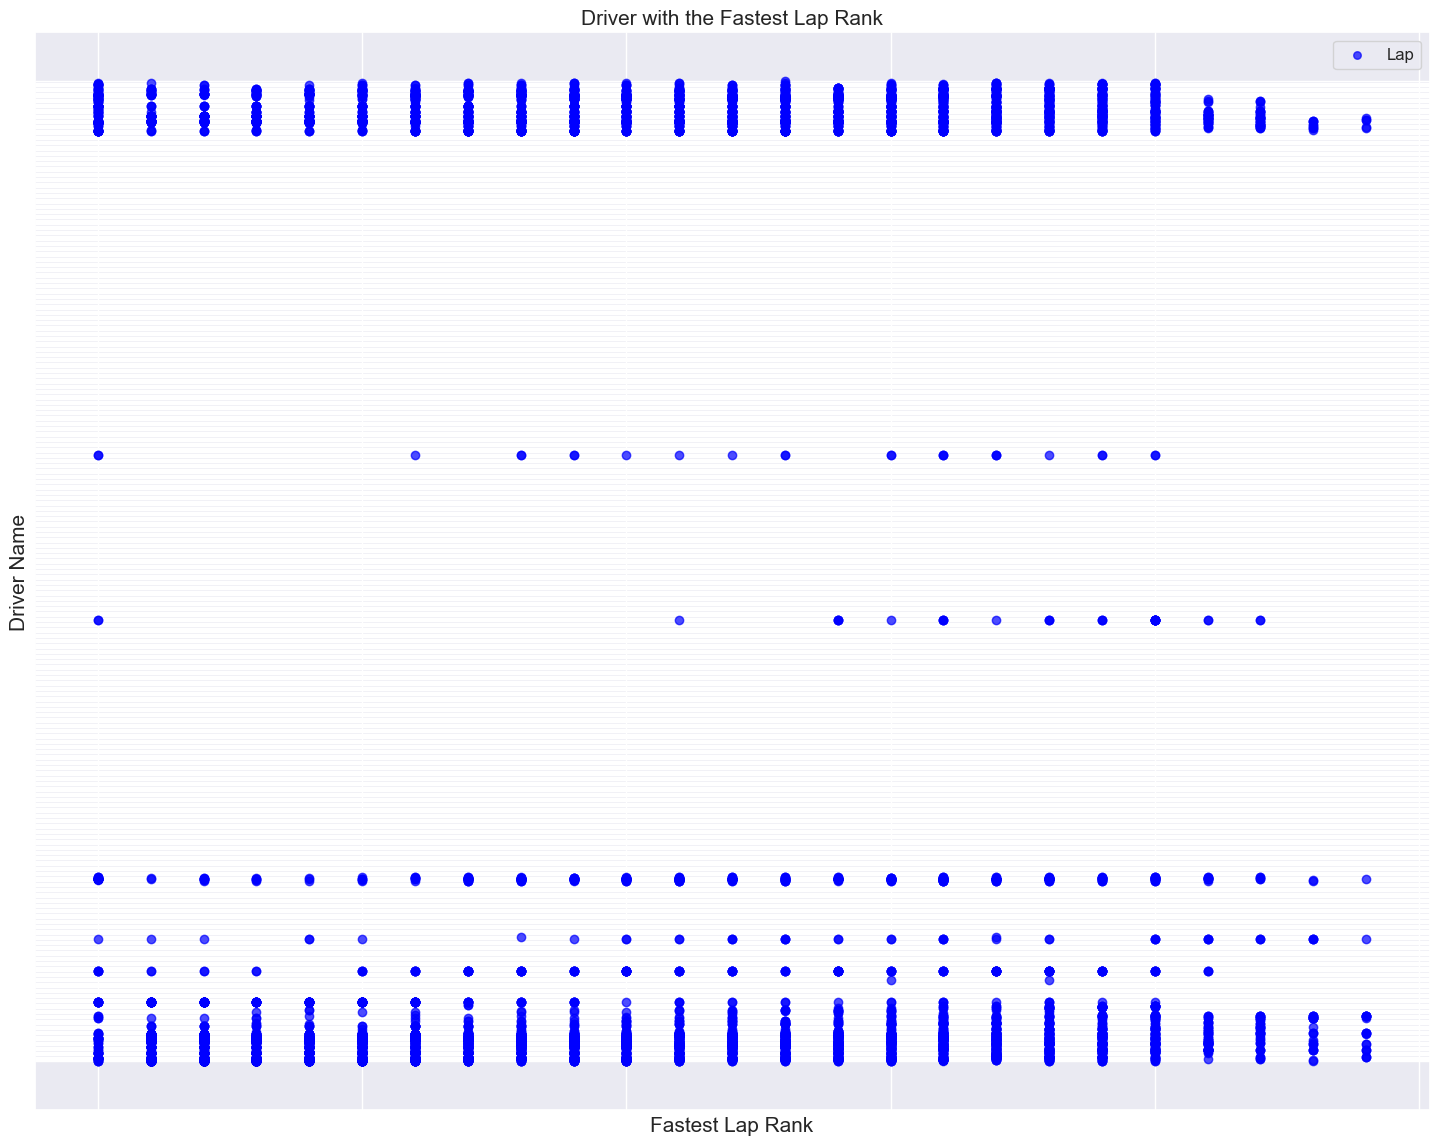

In [226]:
plt.figure(figsize = (18,14))
plt.scatter(df.Fastest_Lap_Rank, df.Driver_Name, alpha = 0.7, color = "Blue", label = "Lap")
plt.xlabel("Fastest Lap Rank", fontsize= 15)
plt.ylabel("Driver Name", fontsize = 15)
plt.title("Driver with the Fastest Lap Rank", fontsize = 15)
plt.legend(markerscale=.9, fontsize= 12)
plt.grid(True)
plt.yticks(rotation = 25, ha = 'right')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

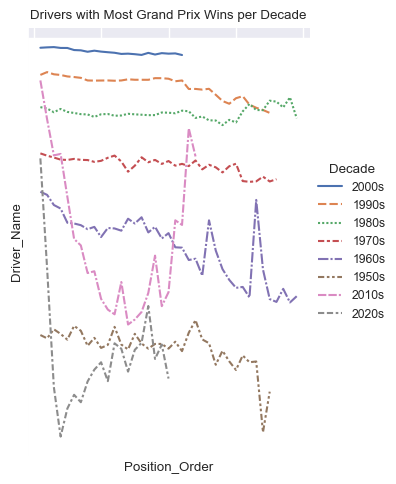

In [227]:
sns.relplot(x="Position_Order", y="Driver_Name",
           data=df, kind="line",
           style="Decade", 
           hue="Decade",
           ci=None).set(title = "Drivers with Most Grand Prix Wins per Decade")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

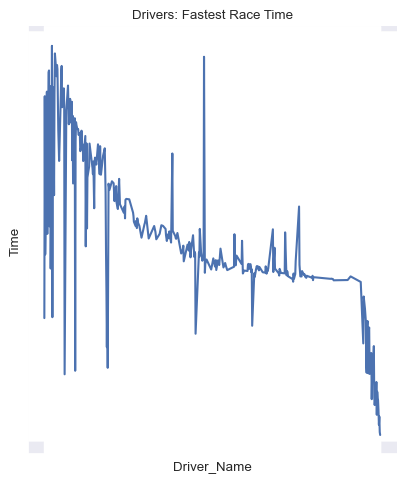

In [228]:
sns.relplot(x="Driver_Name", y="Time",
           data=df, kind="line",
           ci=None).set(title = "Drivers: Fastest Race Time")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

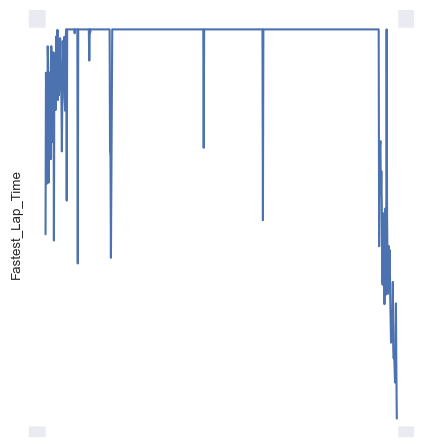

In [229]:
sns.relplot(x="Driver_Name", y="Fastest_Lap_Time", 
            data=df, kind="line", ci=None).set(xlabel= None)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

- Anwering Objectives 2: 

- Was the race team’s success from the car or driver 
    - Which driver had most wins
        - Hamilton (103)
        - Schumacher (97)
    - Which driver had fastest time
        - Lap time
            - Bottas
            - Pérez 
        - Race time
            - Hamilton
            - Schumacher